#### Alfrethanov Christian Wijaya
#### 24060120140147
#### Praktikum Data Mining

# **Import Dataset from Drive**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/PrakDatMin/Cryotherapy.csv')

Mounted at /content/drive


# **Data Understanding**

In [ ]:
df.shape

(90, 7)

In [ ]:
dataset = df.copy()
dataset.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100.0,0
1,1,29,7.00,5,1,96.0,1
2,1,50,8.00,1,3,132.0,0
3,1,32,11.75,7,3,750.0,0
4,1,67,9.25,1,1,42.0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 87 non-null     float64
 6   Result_of_Treatment  90 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 5.0 KB


In [ ]:
dataset.describe()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,87.000000,90.000000
mean,1.477778,28.600000,7.666667,5.511111,1.700000,87.597701,0.533333
std,0.502304,13.360852,3.406661,3.567155,0.905042,133.518439,0.501683
min,1.000000,15.000000,0.250000,1.000000,1.000000,4.000000,0.000000
25%,1.000000,18.000000,4.562500,2.000000,1.000000,20.000000,0.000000
50%,1.000000,25.500000,8.500000,5.000000,1.000000,70.000000,1.000000
75%,2.000000,35.000000,10.687500,8.000000,3.000000,100.000000,1.000000
max,2.000000,67.000000,12.000000,12.000000,3.000000,750.000000,1.000000


In [ ]:
dataset.shape

(90, 7)

In [ ]:
dataset.isnull().sum()

sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   3
Result_of_Treatment    0
dtype: int64

Terdapat 3 Missing Value pada Dataset Cryotherapy.csv pada kolom Area

# **Data Preparation and Cleaning**
## Delete Rows that contain missing values
We can delete the rows because it won't affect that much to the algorithm that we'll use soon because the missing values in this dataset is just 3, we can delete the rows if the missing values in the dataset are not too much, so we have 90 rows in total in this dataset and we'll only have to delete 3 rows

In [ ]:
df = df.dropna(axis=0)
df

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100.0,0
1,1,29,7.00,5,1,96.0,1
2,1,50,8.00,1,3,132.0,0
3,1,32,11.75,7,3,750.0,0
4,1,67,9.25,1,1,42.0,0
...,...,...,...,...,...,...,...
85,2,34,12.00,3,3,95.0,0
86,2,20,3.50,6,1,75.0,1
87,2,35,8.25,8,3,100.0,0
88,1,24,10.75,10,1,20.0,1


Berhasil menghapus 3 baris / rows

# **Data Encoding**
## Encode the data which its value is object, to numerical
##### We have to encode the data so it will be easier when we start to do the algorithm process when there are data with object value
##### **But, for this cryotherapy dataset, we don't have to encode the data because there are no data with object value in the dataset**


# **Algorithm, Modeling, and Evaluation**
## Using KNN Algorithm and Evaluation in Accuracy, Precision, Recall, F1 Score



In [ ]:
import numpy as np # linear algebra
from matplotlib.colors import ListedColormap
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [ ]:
df.head(10)

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100.0,0
1,1,29,7.00,5,1,96.0,1
2,1,50,8.00,1,3,132.0,0
3,1,32,11.75,7,3,750.0,0
4,1,67,9.25,1,1,42.0,0
5,1,41,8.00,2,2,20.0,1
6,1,36,11.00,2,1,8.0,0
8,1,20,4.50,12,1,6.0,1
9,2,34,11.25,3,3,150.0,0
10,2,21,10.75,5,1,35.0,0


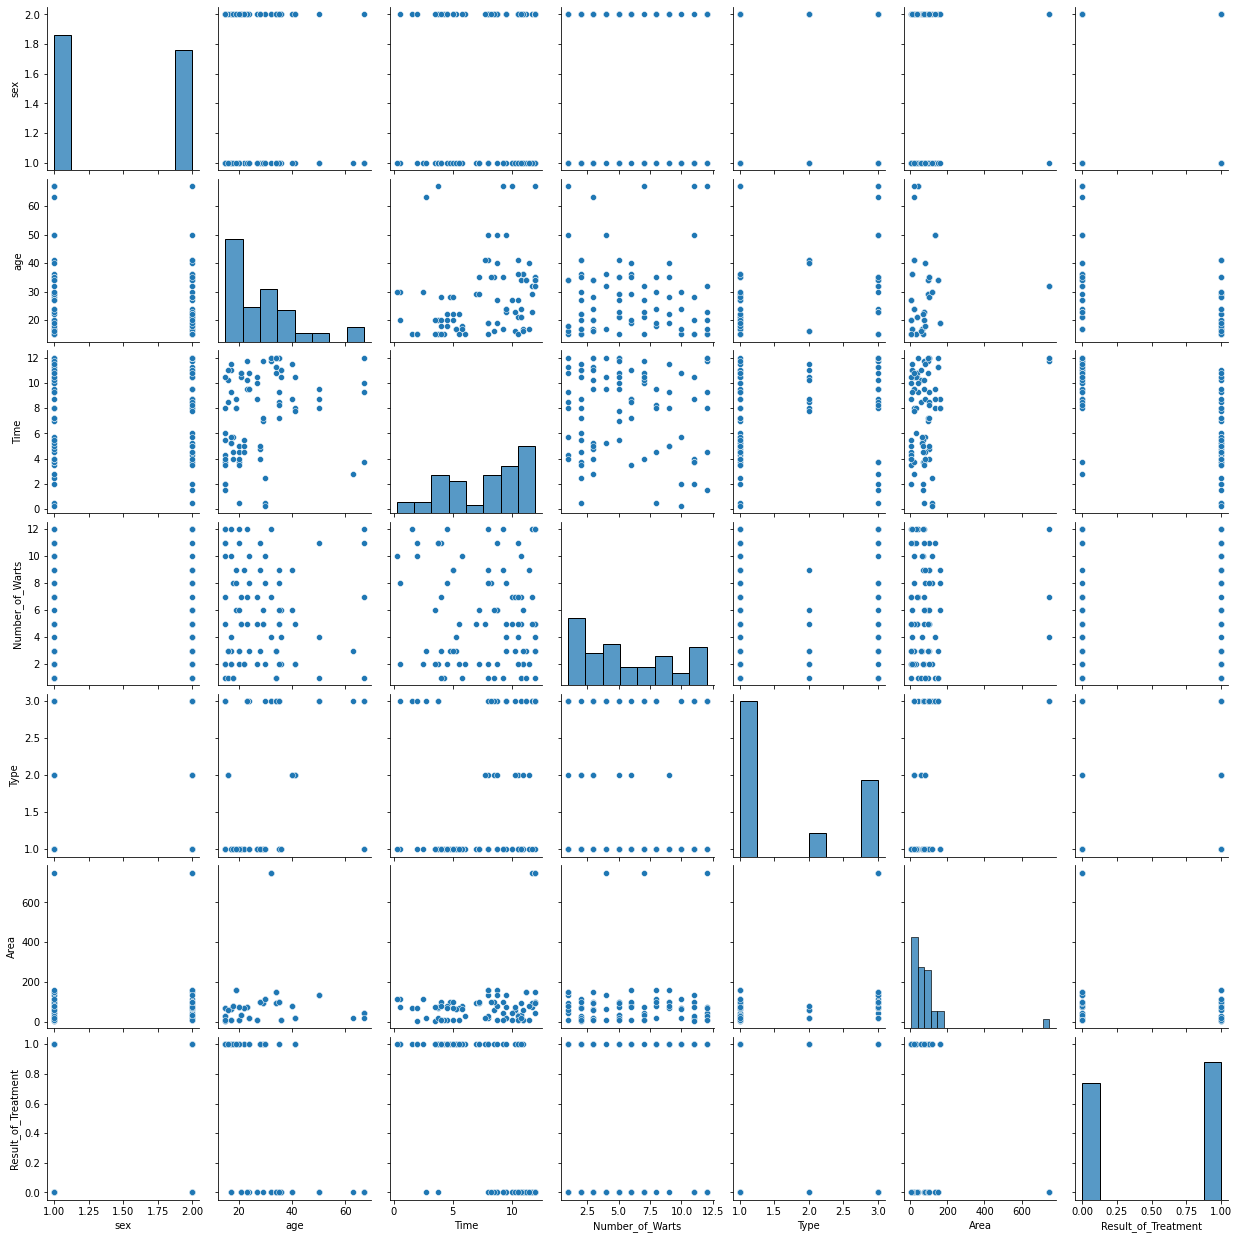

In [ ]:
# Data Modelling
import seaborn as sns
sns.pairplot(df)

In [ ]:
# Dependent Variable
y = df["Result_of_Treatment"]
# Independent Variable
x = df.drop(["Result_of_Treatment"], axis = 1)
x.head()

,sex,age,Time,Number_of_Warts,Type,Area
0,1,35,12.00,5,1,100.0
1,1,29,7.00,5,1,96.0
2,1,50,8.00,1,3,132.0
3,1,32,11.75,7,3,750.0
4,1,67,9.25,1,1,42.0


In [ ]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Result_of_Treatment, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Activating Classification Function
klasifikasi = KNeighborsClassifier(n_neighbors=12)

In [ ]:
# Memasukkan data training pada fungsi klasifikasi
klasifikasi.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
# Menentukan hasil prediksi dari x_test
y_pred = klasifikasi.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
len(y_pred)

18

In [ ]:
# Menentukan probabilitas hasil prediksi
klasifikasi.predict_proba(x_test)

array([[0.58333333, 0.41666667],
       [0.75      , 0.25      ],
       [0.25      , 0.75      ],
       [0.08333333, 0.91666667],
       [0.        , 1.        ],
       [0.25      , 0.75      ],
       [0.16666667, 0.83333333],
       [0.        , 1.        ],
       [0.41666667, 0.58333333],
       [0.        , 1.        ],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [0.16666667, 0.83333333],
       [0.        , 1.        ],
       [0.75      , 0.25      ],
       [0.75      , 0.25      ],
       [0.08333333, 0.91666667],
       [0.41666667, 0.58333333]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[6 3]
 [0 9]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.75      1.00      0.86         9

    accuracy                           0.83        18
   macro avg       0.88      0.83      0.83        18
weighted avg       0.88      0.83      0.83        18



In [ ]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.8333333333333334

Accuracy K=12 : 0.83 / 83,3%


In [ ]:
error_rate=[]
for i in range (1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

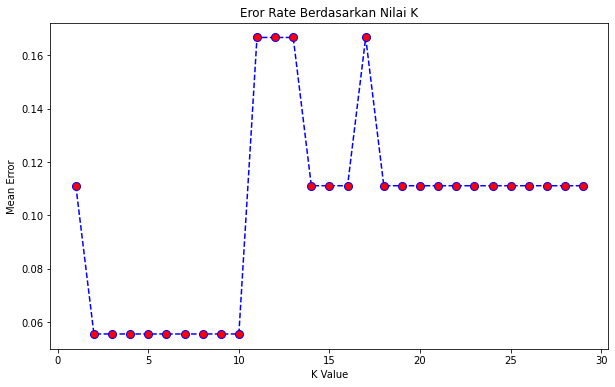

In [ ]:
mtp.figure(figsize=(10,6))
mtp.plot(range(1,30),error_rate, color='blue',linestyle='dashed', marker='o', markerfacecolor = 'red', markersize = 8)
mtp.title('Eror Rate Berdasarkan Nilai K')
mtp.xlabel('K Value')
mtp.ylabel('Mean Error')

Dari output di atas, nilai Error akan minimum ketika K=2, K=3, K=4, K=5, K=6, K=7, K=8, K=9, dan K=10

In [ ]:
# Training and Prediction
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors=2) # Menentukan nilai K (banyaknya tetangga terdekat yg menjadi acuan klasifikasi) 
classifier2.fit(x_train, y_train)

# Prediction
# Output hasil prediksi dengan K=2
y_pred2 = classifier2.predict(x_test).tolist()
print("Output hasil prediksi dengan K=2 \n", y_pred2)

y_actual2=y_test.tolist()
print("Confusion Matrix \n", confusion_matrix(y_actual2,y_pred2))

# Akurasi K=2
accuracy = accuracy_score(y_actual2, y_pred2)
print("Akurasi K=2 :", accuracy)

print("\n", classification_report(y_actual2, y_pred2))

Output hasil prediksi dengan K=2 
 [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
Confusion Matrix 
 [[8 1]
 [0 9]]
Akurasi K=2 : 0.9444444444444444

               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.90      1.00      0.95         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



In [ ]:
# Training and Prediction
classifier3 = KNeighborsClassifier(n_neighbors=3) # Menentukan nilai K (banyaknya tetangga terdekat yg menjadi acuan klasifikasi) 
classifier3.fit(x_train, y_train)

# Prediction
# Output hasil prediksi dengan K=3
y_pred3 = classifier3.predict(x_test).tolist()
print("Output hasil prediksi dengan K=3 \n", y_pred3)

y_actual3=y_test.tolist()
print("Confusion Matrix \n", confusion_matrix(y_actual3,y_pred3))

# Akurasi K=3
accuracy = accuracy_score(y_actual3, y_pred3)
print("Akurasi K=3 :", accuracy)

print("\n", classification_report(y_actual3, y_pred3))

Output hasil prediksi dengan K=3 
 [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
Confusion Matrix 
 [[8 1]
 [0 9]]
Akurasi K=3 : 0.9444444444444444

               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.90      1.00      0.95         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



In [ ]:
# Training and Prediction
classifier4 = KNeighborsClassifier(n_neighbors=4) # Menentukan nilai K (banyaknya tetangga terdekat yg menjadi acuan klasifikasi) 
classifier4.fit(x_train, y_train)

# Prediction
# Output hasil prediksi dengan K=4
y_pred4 = classifier4.predict(x_test).tolist()
print("Output hasil prediksi dengan K=4 \n", y_pred4)

y_actual4=y_test.tolist()
print("Confusion Matrix \n", confusion_matrix(y_actual4,y_pred4))

# Akurasi K=4
accuracy = accuracy_score(y_actual4, y_pred4)
print("Akurasi K=4 :", accuracy)

print("\n", classification_report(y_actual4, y_pred4))

Output hasil prediksi dengan K=4 
 [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
Confusion Matrix 
 [[8 1]
 [0 9]]
Akurasi K=4 : 0.9444444444444444

               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.90      1.00      0.95         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



In [ ]:
# Training and Prediction
classifier5 = KNeighborsClassifier(n_neighbors=5) # Menentukan nilai K (banyaknya tetangga terdekat yg menjadi acuan klasifikasi) 
classifier5.fit(x_train, y_train)

# Prediction
# Output hasil prediksi dengan K=5
y_pred5 = classifier5.predict(x_test).tolist()
print("Output hasil prediksi dengan K=5 \n", y_pred5)

y_actual5=y_test.tolist()
print("Confusion Matrix \n", confusion_matrix(y_actual5,y_pred5))

# Akurasi K=5
accuracy = accuracy_score(y_actual5, y_pred5)
print("Akurasi K=5 :", accuracy)

print("\n", classification_report(y_actual5, y_pred5))

Output hasil prediksi dengan K=5 
 [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
Confusion Matrix 
 [[8 1]
 [0 9]]
Akurasi K=5 : 0.9444444444444444

               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.90      1.00      0.95         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



In [ ]:
# Training and Prediction
classifier6 = KNeighborsClassifier(n_neighbors=6) # Menentukan nilai K (banyaknya tetangga terdekat yg menjadi acuan klasifikasi) 
classifier6.fit(x_train, y_train)

# Prediction
# Output hasil prediksi dengan K=6
y_pred6 = classifier6.predict(x_test).tolist()
print("Output hasil prediksi dengan K=6 \n", y_pred6)

y_actual6=y_test.tolist()
print("Confusion Matrix \n", confusion_matrix(y_actual6,y_pred6))

# Akurasi K=6
accuracy = accuracy_score(y_actual6, y_pred6)
print("Akurasi K=6 :", accuracy)

print("\n", classification_report(y_actual6, y_pred6))

Output hasil prediksi dengan K=6 
 [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
Confusion Matrix 
 [[8 1]
 [0 9]]
Akurasi K=6 : 0.9444444444444444

               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.90      1.00      0.95         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



In [ ]:
# Training and Prediction
classifier7 = KNeighborsClassifier(n_neighbors=7) # Menentukan nilai K (banyaknya tetangga terdekat yg menjadi acuan klasifikasi) 
classifier7.fit(x_train, y_train)

# Prediction
# Output hasil prediksi dengan K=7
y_pred7 = classifier7.predict(x_test).tolist()
print("Output hasil prediksi dengan K=7 \n", y_pred7)

y_actual7=y_test.tolist()
print("Confusion Matrix \n", confusion_matrix(y_actual7,y_pred7))

# Akurasi K=7
accuracy = accuracy_score(y_actual7, y_pred7)
print("Akurasi K=7 :", accuracy)

print("\n", classification_report(y_actual7, y_pred7))

Output hasil prediksi dengan K=7 
 [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
Confusion Matrix 
 [[8 1]
 [0 9]]
Akurasi K=7 : 0.9444444444444444

               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.90      1.00      0.95         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



In [ ]:
# Training and Prediction
classifier8 = KNeighborsClassifier(n_neighbors=8) # Menentukan nilai K (banyaknya tetangga terdekat yg menjadi acuan klasifikasi) 
classifier8.fit(x_train, y_train)

# Prediction
# Output hasil prediksi dengan K=8
y_pred8 = classifier8.predict(x_test).tolist()
print("Output hasil prediksi dengan K=8 \n", y_pred8)

y_actual8=y_test.tolist()
print("Confusion Matrix \n", confusion_matrix(y_actual8,y_pred8))

# Akurasi K=8
accuracy = accuracy_score(y_actual8, y_pred8)
print("Akurasi K=8 :", accuracy)

print("\n", classification_report(y_actual8, y_pred8))

Output hasil prediksi dengan K=8 
 [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
Confusion Matrix 
 [[8 1]
 [0 9]]
Akurasi K=8 : 0.9444444444444444

               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.90      1.00      0.95         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



In [ ]:
# Training and Prediction
classifier9 = KNeighborsClassifier(n_neighbors=9) # Menentukan nilai K (banyaknya tetangga terdekat yg menjadi acuan klasifikasi) 
classifier9.fit(x_train, y_train)

# Prediction
# Output hasil prediksi dengan K=9
y_pred9 = classifier9.predict(x_test).tolist()
print("Output hasil prediksi dengan K=9 \n", y_pred9)

y_actual9=y_test.tolist()
print("Confusion Matrix \n", confusion_matrix(y_actual9,y_pred9))

# Akurasi K=9
accuracy = accuracy_score(y_actual9, y_pred9)
print("Akurasi K=9 :", accuracy)

print("\n", classification_report(y_actual9, y_pred9))

Output hasil prediksi dengan K=9 
 [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
Confusion Matrix 
 [[8 1]
 [0 9]]
Akurasi K=9 : 0.9444444444444444

               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.90      1.00      0.95         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



In [ ]:
# Training and Prediction
classifier10 = KNeighborsClassifier(n_neighbors=10) # Menentukan nilai K (banyaknya tetangga terdekat yg menjadi acuan klasifikasi) 
classifier10.fit(x_train, y_train)

# Prediction
# Output hasil prediksi dengan K=10
y_pred10 = classifier10.predict(x_test).tolist()
print("Output hasil prediksi dengan K=10 \n", y_pred10)

y_actual10=y_test.tolist()
print("Confusion Matrix \n", confusion_matrix(y_actual10,y_pred10))

# Akurasi K=10
accuracy = accuracy_score(y_actual10, y_pred10)
print("Akurasi K=10 :", accuracy)

print("\n", classification_report(y_actual10, y_pred10))

Output hasil prediksi dengan K=10 
 [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
Confusion Matrix 
 [[8 1]
 [0 9]]
Akurasi K=10 : 0.9444444444444444

               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.90      1.00      0.95         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



Dari proses Training dan Prediction untuk K=2 sampai K=10 merupakan K yang terbaik karena memiliki nilai akurasi 0.94 atau 94,4% dan nilai akurasi tersebut lebih besar daripada nilai akurasi untuk K=12, yaitu 83,3%, kemudian mempunyai nilai precision, recall, dan f1-score yang paling optimal ketimbang nilai precision, recall, dan f1-score untuk K=12